In [2]:
from pydent import AqSession
# from pydent import __version__
# print(__version__)

In [ ]:
from types import SimpleNamespace #to use dot notation
p = {"id": 6558}
plan = SimpleNamespace(**p)
session.utils.delete_plan(plan)

In [3]:
import json
prettyprint = lambda x: json.dumps(x, indent=4, sort_keys=True)

In [ ]:
with open('all_plans_formatted_with_category.json', 'r') as f:
    aq_plans_json = json.load(f)

print(aq_plans_json)
print(prettyprint(aq_plans_json[0]))

In [5]:
import json
from pandas.io.json import json_normalize

#plan: id, created_at, updated_at, status, user_id, operations
#operations: created_at, updated_at, status, user_id, operation_type_id, field_values
#field_values: role (output), sample
#sample: id

# load json plans into pandas DataFrame
plans_df = json_normalize(aq_plans_json, 
                       record_path=['operations', 'field_values'], 
                       meta=['id', 'created_at', 'updated_at', 'status', 'user_id',
                            ['op', 'id'], ['op', 'operation_type_id'], ['op', 'created_at'], ['op', 'updated_at'], ['op', 'status'], ['op', 'operation_type']],
                       record_prefix='fv.')

In [6]:
plans_df.head(5)

,fv.rid,fv.role,fv.sample,id,created_at,updated_at,status,user_id,op.id,op.operation_type_id,op.created_at,op.updated_at,op.status,op.operation_type
0,19237,output,20152.0,9,2017-07-13T08:29:06.000-07:00,2018-07-27T08:39:35.000-07:00,None,66,17,48,2017-07-13T08:29:06.000-07:00,2017-07-13T08:50:43.000-07:00,done,Cloning
1,19247,output,20153.0,10,2017-07-13T08:29:06.000-07:00,2018-07-27T08:39:35.000-07:00,None,66,18,48,2017-07-13T08:29:06.000-07:00,2017-07-13T08:50:43.000-07:00,done,Cloning
2,19279,input,20269.0,13,2017-07-13T08:58:15.000-07:00,2017-07-13T08:58:16.000-07:00,None,17,27,20,2017-07-13T08:58:15.000-07:00,2017-07-13T09:17:41.000-07:00,error,Cloning
3,19280,output,20269.0,13,2017-07-13T08:58:15.000-07:00,2017-07-13T08:58:16.000-07:00,None,17,27,20,2017-07-13T08:58:15.000-07:00,2017-07-13T09:17:41.000-07:00,error,Cloning
4,19281,output,20269.0,13,2017-07-13T08:58:15.000-07:00,2017-07-13T08:58:16.000-07:00,None,17,27,20,2017-07-13T08:58:15.000-07:00,2017-07-13T09:17:41.000-07:00,error,Cloning


In [7]:
plans_df.loc[plans_df['user_id'] == 193 & plans_df['status'].isnull()]['id'].nunique()

2

In [8]:
# number of total plans
print(plans_df['id'].nunique()) #8819

# number of total users
print(plans_df['user_id'].nunique()) #86

8819
86


In [9]:
# group plans by user and count
plans_by_user = plans_df.groupby('user_id').id.nunique()
print(plans_by_user)

user_id
1         6
5         4
13      526
16        1
17       26
19       56
48       83
51      108
56        4
66      687
82        5
85     1449
87      144
93      465
103      31
111      13
118       8
120      44
121     137
134       9
143     683
146     119
160       1
162      49
170     316
178      22
189     114
191      20
193      13
194      50
       ... 
243      41
245       1
246       1
248       1
249       1
250      16
252     123
254       1
255      52
256       6
257      39
259       8
260      42
264      15
265      68
266      15
267      22
268      13
272      12
273       6
279       9
282       1
284       1
285       4
286      27
287      10
288       6
289      17
290       1
291       5
Name: id, Length: 86, dtype: int64


In [10]:
"""
Find "real" plans by filtering out any plans that are "planning" or templates
"""

# all possible plan statuses 
print(plans_df['status'].unique()) # [None, 'planning', 'template', 'system_template']

plans_df_real = plans_df.loc[plans_df['status'].isnull()]

print(plans_df_real['user_id'].nunique()) #74 users
print(plans_df_real['id'].nunique()) #~7,500 plans
print(plans_df_real['op.id'].nunique()) #~88,000 operations

[None 'template' 'planning' 'system_template']
74
7574
87996


11.618167414840244
24.55340909822113
643
1
0    1
dtype: int64


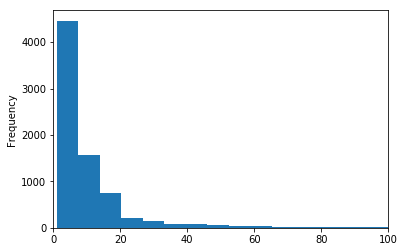

In [11]:
'''
Get stats about number of operations per plan
'''

#groupby describe()? 

# plans_df_real.head(10)
ops_per_plan = plans_df_real.groupby("id")['op.id'].nunique()
print(ops_per_plan.mean()) #~12
print(ops_per_plan.std()) #~25
print(ops_per_plan.max()) #643
print(ops_per_plan.min()) #1
print(ops_per_plan.mode()) #1

%matplotlib inline
ops_per_plan.plot.hist(xlim=(0,100), bins=100)

In [12]:
# all possible operation categories
op_categories = plans_df_real['op.operation_type'].unique()
print(op_categories) 
print(len(op_categories))

['Cloning' 'Yeast Trash' 'Manager' 'Misc.' 'Cloning Sandbox'
 'Tissue Culture Lentivirus' 'Tissue Culture' 'Reagents'
 'Agrobacterium work' 'OBSOLETE' 'Hydra Transgenics' 'Hydra Husbandry'
 'Plant Work' 'Flow Cytometry' 'Induction - High Throughput'
 'Next Gen Prep' 'Yeast Display' 'Yeast' 'YG_Harmonization'
 'Library Cloning' 'RNA' 'Illumina NGS' 'Unsorted' 'OLASimple'
 'Preparative qPCR' 'Plate Reader' 'Control Blocks' 'SynAg'
 'Protein Purification' 'qPCR' 'High Throughput Culturing']
31


In [13]:
'''
Count number of unique operations for each plan
'''
unique_ops = plans_df_real.drop_duplicates('op.id') #drop duplicate op ids
count_categories = plans_df_real.groupby(['id', 'op.operation_type']).size().unstack(fill_value=0)#to_frame('size')
count_categories

#other_columns = unique_ops[['id', 'user_id', 'created_at', 'updated_at']].copy()
#other_columns
# combined = other_columns.merge(count_categories, on="id")
# combined

op.operation_type,Agrobacterium work,Cloning,Cloning Sandbox,Control Blocks,Flow Cytometry,High Throughput Culturing,Hydra Husbandry,Hydra Transgenics,Illumina NGS,Induction - High Throughput,...,Reagents,SynAg,Tissue Culture,Tissue Culture Lentivirus,Unsorted,YG_Harmonization,Yeast,Yeast Display,Yeast Trash,qPCR
id,,,,,,,,,,,,,,,,,,,,,
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
for column in count_categories.columns:
    count_categories[column] = min_max_scaler.fit_transform(count_categories[column].values.reshape(-1,1))
count_categories

op.operation_type,Agrobacterium work,Cloning,Cloning Sandbox,Control Blocks,Flow Cytometry,High Throughput Culturing,Hydra Husbandry,Hydra Transgenics,Illumina NGS,Induction - High Throughput,...,Reagents,SynAg,Tissue Culture,Tissue Culture Lentivirus,Unsorted,YG_Harmonization,Yeast,Yeast Display,Yeast Trash,qPCR
id,,,,,,,,,,,,,,,,,,,,,
9,0.0,0.000904,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
10,0.0,0.000904,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
13,0.0,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
15,0.0,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
17,0.0,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
18,0.0,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
20,0.0,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
27,0.0,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
29,0.0,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [39]:
import pandas as pd
# Queries
plan_id = 9
#plans_df_real[['id','user_id','created_at','updated_at']].query("id == 9")
# plan_user_and_date = plans_df_real[['id', 'user_id', 'created_at']].query("id == {0}".format(plan_id))
plan_user_and_date = unique_ops[['id', 'user_id', 'created_at']]
# pd.to_datetime(plan_user_and_date['created_at']).dt.date
plan_user_and_date

,id,user_id,created_at
0,9,66,2017-07-13T08:29:06.000-07:00
1,10,66,2017-07-13T08:29:06.000-07:00
2,13,17,2017-07-13T08:58:15.000-07:00
5,13,17,2017-07-13T08:58:15.000-07:00
7,13,17,2017-07-13T08:58:15.000-07:00
11,13,17,2017-07-13T08:58:15.000-07:00
13,13,17,2017-07-13T08:58:15.000-07:00
15,13,17,2017-07-13T08:58:15.000-07:00
17,15,17,2017-07-13T09:01:17.000-07:00
20,15,17,2017-07-13T09:01:17.000-07:00


In [87]:
import time
def convert_to_timestamp(x):
    """Convert date objects to integers"""
    return time.mktime(x.timetuple())

#Convert to date objects
unique_plans = plans_df_real.drop_duplicates('id') #drop duplicate plan ids
plan_user_and_date = unique_plans[['id', 'created_at', 'user_id',]]
plan_user_and_date['created_at'] = pd.to_datetime(plan_user_and_date['created_at'], utc=True).dt.date
plan_user_and_date['created_at'] = plan_user_and_date['created_at'].apply(convert_to_timestamp)

# date_scaler = preprocessing.MinMaxScaler(feature_range=(0, 10))
date_scaler = preprocessing.MinMaxScaler()
plan_user_and_date['created_at'] = date_scaler.fit_transform(plan_user_and_date['created_at'].values.reshape(-1,1))
plan_user_and_date

/Users/danyfu/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/danyfu/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/danyfu/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,id,created_at,user_id
0,9,0.000000,66
1,10,0.000000,66
2,13,0.000000,17
17,15,0.000000,17
32,17,0.000000,17
47,18,0.000000,17
62,20,0.000000,17
77,27,0.000000,17
92,29,0.000000,17
107,31,0.000000,17


In [89]:
# merge normalized count and date
merged = pd.merge(count_categories, plan_user_and_date, on='id')
merged

,id,Agrobacterium work,Cloning,Cloning Sandbox,Control Blocks,Flow Cytometry,High Throughput Culturing,Hydra Husbandry,Hydra Transgenics,Illumina NGS,...,Tissue Culture,Tissue Culture Lentivirus,Unsorted,YG_Harmonization,Yeast,Yeast Display,Yeast Trash,qPCR,created_at,user_id
0,9,0.0,0.000904,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,66
1,10,0.0,0.000904,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,66
2,13,0.0,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,17
3,15,0.0,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,17
4,17,0.0,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,17
5,18,0.0,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,17
6,20,0.0,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,17
7,27,0.0,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,17
8,29,0.0,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,17
9,31,0.0,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,17


In [92]:
user_85_plans = merged.query("user_id == 85")
user_85_plans

,id,Agrobacterium work,Cloning,Cloning Sandbox,Control Blocks,Flow Cytometry,High Throughput Culturing,Hydra Husbandry,Hydra Transgenics,Illumina NGS,...,Tissue Culture,Tissue Culture Lentivirus,Unsorted,YG_Harmonization,Yeast,Yeast Display,Yeast Trash,qPCR,created_at,user_id
52,345,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.034483,0.0,0.000000,85
53,347,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.034483,0.0,0.000000,85
54,349,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.034483,0.0,0.000000,85
55,350,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.034483,0.0,0.000000,85
56,352,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.034483,0.0,0.000000,85
63,410,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.034483,0.0,0.001473,85
78,499,0.0,0.024412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.005891,85
81,511,0.0,0.016275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.005891,85
88,542,0.0,0.005425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.007364,85
89,546,0.0,0.005425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.007364,85


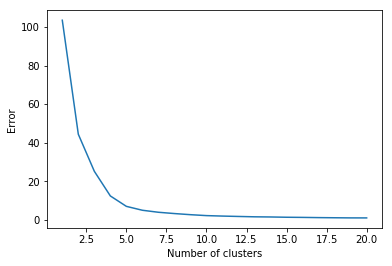

In [107]:
#elbow method to determine K on raw normalized data (on user 85)

import numpy as np
def evaluate_clusters(X,max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_

    plt.plot(range(1,len(error)),error[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')

evaluate_clusters(user_85_plans.iloc[:,2:33],20)
plt.show()

In [104]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=100, max_iter=1000)
kmeans_labels = kmeans.fit_predict(user_85_plans.iloc[:,2:33])
print(kmeans_labels)
print(len(kmeans_labels))

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [90]:
# don't use the ids and the user id
merged.iloc[:,2:33] #34 is user_id

,Cloning,Cloning Sandbox,Control Blocks,Flow Cytometry,High Throughput Culturing,Hydra Husbandry,Hydra Transgenics,Illumina NGS,Induction - High Throughput,Library Cloning,...,SynAg,Tissue Culture,Tissue Culture Lentivirus,Unsorted,YG_Harmonization,Yeast,Yeast Display,Yeast Trash,qPCR,created_at
0,0.000904,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
1,0.000904,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
2,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
5,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
6,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
7,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
8,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
9,0.013562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000


In [77]:
import sklearn.metrics as metrics
euclidean_dists = metrics.euclidean_distances(merged.iloc[:,2:33])
len(euclidean_dists[0])

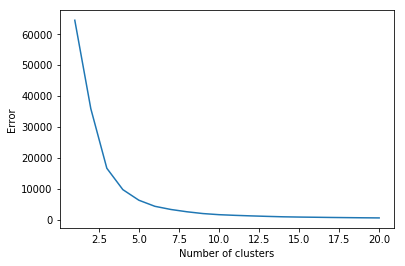

In [108]:
#elbow method to determine K on euclidean distance data (user 85)
import numpy as np
def evaluate_clusters(X,max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_

    plt.plot(range(1,len(error)),error[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')

user_85_euclidean_dists = metrics.euclidean_distances(user_85_plans.iloc[:,2:33])
print(len(user_85_euclidean_dists))

evaluate_clusters(user_85_euclidean_dists,20)
plt.show()

In [358]:
"""
Get lab stats
"""

# all possible operation statuses 
print(plans_df_real['op.status'].unique()) 
# ['done', 'error', 'primed', 'waiting', 'delayed', 'pending','planning', 'running']

# all rows where op.id is unique
plans_df_real_unique_ops = plans_df_real.drop_duplicates('op.id')
total_ops = plans_df_real_unique_ops.shape[0]
error_ops = plans_df_real_unique_ops.loc[plans_df_real['op.status'] == 'error'].shape[0]
done_ops = plans_df_real_unique_ops.loc[plans_df_real['op.status'] == 'done'].shape[0]

print(total_ops) # 87996 total
print(error_ops) # 13151 ops error
print(done_ops) # 70578 ops done

# error rate
print(error_ops/total_ops) # 15%
# done_rate 
print(done_ops/total_ops) # 80%


# Find operations with highest error rates
# excluding ones that fail 100% or have been performed less than 10 times

print(plans_df_real['op.operation_type_id'].nunique()) #313 operation types

# Only used finished operations
finished_ops = plans_df_real_unique_ops.loc[plans_df_real_unique_ops['op.status'].isin(['done', 'error'])]

# Filter out operations where operation_type has been performed less than 10 times
tested_finished_ops = finished_ops.loc[finished_ops.groupby('op.operation_type_id')['op.id'].transform('nunique') > 10]
print(tested_finished_ops['op.operation_type_id'].nunique()) #212 operation types


# # find done vs error numbers by operation type
op_type_status = tested_finished_ops.groupby(['op.operation_type_id', 'op.status']).size()
op_type_status
# error_by_optype_df = (op_type_status / op_type_status.groupby(level=0).sum()).unstack(fill_value=0)
# op_types_with_highest_errors = error_by_optype_df.loc[(error_by_optype_df['error'] > 0.15) & (error_by_optype_df['error'] < 1.00)]
# op_types_with_highest_errors #107 operation types with failure rate higher than lab average
# op_types_with_highest_errors.sort_values('error', ascending=False)

['done' 'error' 'primed' 'waiting' 'delayed' 'pending' 'planning'
 'running']
87996
13151
70578
0.1494499749988636
0.8020591845083868
313
212


op.operation_type_id  op.status
15                    done         2416
                      error         233
16                    done         1952
                      error         672
17                    done         2440
                      error         199
18                    done          101
                      error          45
19                    done           87
                      error          42
20                    done           27
                      error          31
21                    done         2198
                      error          58
22                    done         2257
                      error          98
23                    done         1430
                      error          78
24                    done         2041
                      error         500
25                    done         1528
                      error         175
26                    done         1844
                      error         113
27      

313
212


op.status,done,error
op.operation_type_id,,
145,0.257143,0.742857
174,0.344828,0.655172
405,0.361702,0.638298
199,0.375000,0.625000
641,0.382775,0.617225
642,0.384058,0.615942
407,0.393939,0.606061
172,0.416667,0.583333
217,0.428571,0.571429


In [336]:
"""
Find plans submitted by the most active users
by filtering out any users who have submitted less than 10 "real" plan
"""
plans_df_most_active_users = plans_df_real[plans_df_real.groupby('user_id').id.transform('nunique') > 10]
print(plans_df_most_active_users['user_id'].nunique()) #47 users, 

# sort user_id by number of plans
plans_df_most_active_users.groupby('user_id').id.nunique().sort_values(ascending=False).reset_index(name='count')

# 16 users have submitted >100 plans
# top 10 people submitted 75% of all "real" plans

47


,user_id,count
0,85,1251
1,219,792
2,209,608
3,143,545
4,66,509
5,13,509
6,93,464
7,228,289
8,170,258
9,213,232
